##### Jupyter Notebook, Step 3 - Feature Importance
- Use the results from step 2 to discuss feature importance in the dataset
- Considering these results, develop a strategy for building a final predictive model
- recommended approaches:
    - Use feature selection to reduce the dataset to a manageable size then use conventional methods
    - Use dimension reduction to reduce the dataset to a manageable size then use conventional methods
    - Use an iterative model training method to use the entire dataset

For this section, I will build a gridsearch pipeline to tune hyperparameters on the five models I have chosen. I will perform this gridsearch using the results from the 3 different feature selection methods used in notebook 2. 

The results will be appened to a list of dictionaries which I will then transform into a dataframe for readability. The top result of this notebook should be a final model that I can test on the full madelon dataset, and potentially a very large dataset from Josh's page. 

Pipeline to include: Standard Scaler, Model

Models to search through: 
### LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

### KNeighborsClassifier

n_neighbors [1 through some number 10-100]
weights: 'uniform', 'distance'

### DecisionTreeClassifier

params = {
    'max_depth': [1,2,3,4,None],
    'max_features': [2,3,4,5,6,7],
    'max_leaf_nodes': [5,10,15,20,25,30,35,40,None],
    'min_samples_leaf': [1,2,3,4,5,6]
}

### SVC

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
 
### Naive Bayes

### fit voting classifier with Logistic Regression, SVC, KNC, Naive Bayes, Decision Tree Classifier

## Steps
1. Load the datasets
2. Load the feature sets 
2a. train_test_split
3. make the pipeline (standardscaler, model), params = {' ': ,} , and gridsearchcv(model, params)
4. show results (results = pd.DataFrame(clf.cv_results_), results.sort_values('mean_test_score', ascending=False, axis=0).head(1), .best_estimator_) 
5. repeat 3-4 for all 4 models
6. Note best model and save

In [123]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA, KernelPCA
import csv
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import dbscan
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
madelon_file ='madelon_train.csv'
madelon_data = []        

with open(madelon_file) as f:
    readcsv = csv.reader(f, delimiter=' ')
    
    for row in readcsv:
        madelon_data.append(row)
        
madelon_file_target ='madelon_train_targets.csv'
madelon_data_target = []        

with open(madelon_file_target) as f:
    readcsv = csv.reader(f, delimiter=' ')
    
    for row in readcsv:
        madelon_data_target.append(row)
        
madelon1 = madelon_data

madelon_data_df = pd.DataFrame(madelon1)
madelon_targets_df = pd.DataFrame(madelon_data_target)

X = madelon_data_df
y = madelon_targets_df
X['y'] = y

X = X.drop([500],axis=1)
X['y'] = X['y'].map(int)
for column in X.columns:
    X[column] = X[column].map(int)


y = X['y']
X = X.drop(['y'], axis=1)

In [3]:
with open('supports.pkl', 'rb') as f:
    supports = pickle.load(f)

madelon_uci = pd.read_pickle('m_uci_1.pickle')

In [4]:
supports

[0      28
 1      48
 2      64
 3     105
 4     128
 5     153
 6     241
 7     281
 8     318
 9     336
 10    338
 11    378
 12    433
 13    442
 14    451
 15    453
 16    455
 17    472
 18    475
 19    493
 Name: 0, dtype: int64,
 array([ 32,  34,  40,  47,  48,  70, 105, 128, 193, 235, 282, 378, 380,
        402, 415, 417, 420, 435, 474, 477]),
 array([  1,  32,  34,  40,  43,  47,  51,  55,  70,  73,  75,  80,  83,
         85,  93, 111, 126, 131, 141, 155, 162, 192, 193, 196, 200, 207,
        209, 213, 218, 231, 287, 295, 299, 306, 376, 387, 389, 395, 407,
        415, 417, 418, 420, 424, 430, 435, 441, 452, 461, 463, 473, 476])]

In [57]:
madelon_uci[supports[0]].shape

(440, 20)

In [58]:
results = pd.DataFrame()

In [59]:
results

""


### Set train and test based on unsupervised learning stack

In [60]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X[supports[0]], y, test_size=0.3, random_state=42)

In [27]:
X_train.shape

(1400, 20)

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Drill down to 5 for PCA and refit as a dataframe

In [115]:
pca = PCA(n_components=20)
pca.fit(X_train_sc)

X_train_pca = pd.DataFrame(pca.transform(X_train_sc))
X_test_pca = pd.DataFrame(pca.transform(X_test_sc))

In [116]:
ss2 = StandardScaler()
X_train_sc2 = ss.fit_transform(X_train_pca)
X_test_sc2 = ss.transform(X_test_pca)

In [117]:
X_train_sc2.shape

(4200, 20)

In [128]:
pca.explained_variance_

array([  6.75078539e+00,   5.77752726e+00,   3.23460740e+00,
         2.28370788e+00,   1.95337206e+00,   2.04825791e-30,
         1.85729436e-30,   1.84782520e-30,   1.75405040e-30,
         1.68934663e-30,   1.61191544e-30,   1.50243335e-30,
         1.42691664e-30,   1.38252586e-30,   1.35450965e-30,
         1.23183023e-30,   1.16289514e-30,   1.09919010e-30,
         9.94472697e-31,   9.67971241e-31])

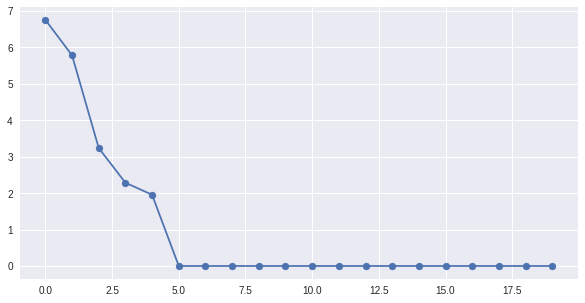

In [134]:
fig = plt.figure(figsize=(10,5))
plt.scatter(list(range(20)), pca.explained_variance_)
plt.plot(list(range(20)), pca.explained_variance_)

### Gridsearch best K Neighbors Classifier

In [15]:
params = {
    'n_neighbors': list(range(1,30)), 
    'weights': ['uniform','distance']
}   

knc = KNeighborsClassifier()
knc_grd = GridSearchCV(knc, params)
knc_grd.fit(X_train_pca, y_train)
results = pd.DataFrame(knc_grd.cv_results_)
results['model'] = 'KNeighborsClassifier'
results.sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,model
11,0.002434,0.003132,0.840714,1.0,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",1,0.820128,1.0,0.845824,1.0,0.856223,1.0,0.000052,0.000088,0.015170,0.0,KNeighborsClassifier
21,0.002466,0.003821,0.832857,1.0,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",2,0.813704,1.0,0.843683,1.0,0.841202,1.0,0.000070,0.000147,0.013588,0.0,KNeighborsClassifier
19,0.002372,0.003645,0.831429,1.0,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",3,0.809422,1.0,0.837259,1.0,0.847639,1.0,0.000025,0.000025,0.016136,0.0,KNeighborsClassifier
23,0.002489,0.004076,0.831429,1.0,12,distance,"{'n_neighbors': 12, 'weights': 'distance'}",3,0.815846,1.0,0.843683,1.0,0.834764,1.0,0.000017,0.000033,0.011610,0.0,KNeighborsClassifier
7,0.002988,0.002739,0.830714,1.0,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",5,0.805139,1.0,0.830835,1.0,0.856223,1.0,0.000665,0.000099,0.020851,0.0,KNeighborsClassifier


In [16]:
estimators = []
estimators.append(knc_grd.best_estimator_)
knc_grd.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [17]:
results.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,model
11,0.002434,0.003132,0.840714,1.000000,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",1,0.820128,1.000000,0.845824,1.000000,0.856223,1.000000,0.000052,0.000088,0.015170,0.000000,KNeighborsClassifier
21,0.002466,0.003821,0.832857,1.000000,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",2,0.813704,1.000000,0.843683,1.000000,0.841202,1.000000,0.000070,0.000147,0.013588,0.000000,KNeighborsClassifier
19,0.002372,0.003645,0.831429,1.000000,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",3,0.809422,1.000000,0.837259,1.000000,0.847639,1.000000,0.000025,0.000025,0.016136,0.000000,KNeighborsClassifier
23,0.002489,0.004076,0.831429,1.000000,12,distance,"{'n_neighbors': 12, 'weights': 'distance'}",3,0.815846,1.000000,0.843683,1.000000,0.834764,1.000000,0.000017,0.000033,0.011610,0.000000,KNeighborsClassifier
7,0.002988,0.002739,0.830714,1.000000,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",5,0.805139,1.000000,0.830835,1.000000,0.856223,1.000000,0.000665,0.000099,0.020851,0.000000,KNeighborsClassifier
15,0.002474,0.003482,0.829286,1.000000,8,distance,"{'n_neighbors': 8, 'weights': 'distance'}",6,0.811563,1.000000,0.828694,1.000000,0.847639,1.000000,0.000034,0.000095,0.014731,0.000000,KNeighborsClassifier
17,0.002392,0.003500,0.827857,1.000000,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",7,0.820128,1.000000,0.830835,1.000000,0.832618,1.000000,0.000046,0.000119,0.005516,0.000000,KNeighborsClassifier
25,0.002381,0.004068,0.827143,1.000000,13,distance,"{'n_neighbors': 13, 'weights': 'distance'}",8,0.809422,1.000000,0.835118,1.000000,0.836910,1.000000,0.000090,0.000071,0.012559,0.000000,KNeighborsClassifier
9,0.002405,0.002937,0.826429,1.000000,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",9,0.811563,1.000000,0.824411,1.000000,0.843348,1.000000,0.000071,0.000101,0.013052,0.000000,KNeighborsClassifier
13,0.002487,0.003382,0.826429,1.000000,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",9,0.809422,1.000000,0.822270,1.000000,0.847639,1.000000,0.000027,0.000013,0.015875,0.000000,KNeighborsClassifier


In [18]:
knc_grd.score(X_test_pca, y_test)

0.85833333333333328

### Gridsearch best Logistic Regression

In [19]:
lg_params = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2,5,10)
}   

lgr = LogisticRegression()
lgr_grd = GridSearchCV(lgr, lg_params)
lgr_grd.fit(X_train_pca, y_train)
log_results = pd.DataFrame(lgr_grd.cv_results_)
log_results['model'] = 'Logistic Regression'
results = pd.concat([log_results, results])
results.sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,model,param_C,param_n_neighbors,param_penalty,param_weights,params,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
11,0.002434,0.003132,0.840714,1.0,KNeighborsClassifier,NaN,6,NaN,distance,"{'n_neighbors': 6, 'weights': 'distance'}",...,0.820128,1.0,0.845824,1.0,0.856223,1.0,0.000052,0.000088,0.015170,0.0
21,0.002466,0.003821,0.832857,1.0,KNeighborsClassifier,NaN,11,NaN,distance,"{'n_neighbors': 11, 'weights': 'distance'}",...,0.813704,1.0,0.843683,1.0,0.841202,1.0,0.000070,0.000147,0.013588,0.0
23,0.002489,0.004076,0.831429,1.0,KNeighborsClassifier,NaN,12,NaN,distance,"{'n_neighbors': 12, 'weights': 'distance'}",...,0.815846,1.0,0.843683,1.0,0.834764,1.0,0.000017,0.000033,0.011610,0.0
19,0.002372,0.003645,0.831429,1.0,KNeighborsClassifier,NaN,10,NaN,distance,"{'n_neighbors': 10, 'weights': 'distance'}",...,0.809422,1.0,0.837259,1.0,0.847639,1.0,0.000025,0.000025,0.016136,0.0
7,0.002988,0.002739,0.830714,1.0,KNeighborsClassifier,NaN,4,NaN,distance,"{'n_neighbors': 4, 'weights': 'distance'}",...,0.805139,1.0,0.830835,1.0,0.856223,1.0,0.000665,0.000099,0.020851,0.0


In [20]:
#estimators.append(lgr_grd.best_estimator_)
lgr_grd.best_estimator_

LogisticRegression(C=12.915496650148841, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
lgr_grd.score(X_test_pca, y_test)

0.58166666666666667

### Gridsearch best SVC

In [22]:
X_train_pca.shape

(1400, 5)

In [23]:
svc_params = {
    'C': np.logspace(.5,1.5,3),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}   

svc = SVC()
svc_grd = GridSearchCV(svc, svc_params)
svc_grd.fit(X_train_pca, y_train)
svc_results = pd.DataFrame(svc_grd.cv_results_)
svc_results['model'] = 'SVC'
results = pd.concat([svc_results, results])
results.sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,model,param_C,param_kernel,param_n_neighbors,param_penalty,param_weights,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
10,0.042199,0.006743,0.850000,0.911786,SVC,31.6228,rbf,NaN,NaN,NaN,...,0.847966,0.907824,0.839400,0.915327,0.862661,0.912206,0.003244,0.000051,0.009603,0.003077
11,0.002434,0.003132,0.840714,1.000000,KNeighborsClassifier,NaN,NaN,6,NaN,distance,...,0.820128,1.000000,0.845824,1.000000,0.856223,1.000000,0.000052,0.000088,0.015170,0.000000
6,0.032401,0.007862,0.834286,0.883570,SVC,10,rbf,NaN,NaN,NaN,...,0.832976,0.878885,0.839400,0.883173,0.830472,0.888651,0.001075,0.000259,0.003760,0.003997
21,0.002466,0.003821,0.832857,1.000000,KNeighborsClassifier,NaN,NaN,11,NaN,distance,...,0.813704,1.000000,0.843683,1.000000,0.841202,1.000000,0.000070,0.000147,0.013588,0.000000
23,0.002489,0.004076,0.831429,1.000000,KNeighborsClassifier,NaN,NaN,12,NaN,distance,...,0.815846,1.000000,0.843683,1.000000,0.834764,1.000000,0.000017,0.000033,0.011610,0.000000


In [24]:
estimators.append(svc_grd.best_estimator_)
svc_grd.best_estimator_

SVC(C=31.622776601683793, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
svc_grd.score(X_test_pca, y_test)

0.87333333333333329

### Gridsearch best Decision Tree Classifier

In [78]:
dtc = DecisionTreeClassifier() 
dtc_params = { 
    'max_depth': [1,2,3,4,None], 
    'max_features': [2,3,4,5], 
    'max_leaf_nodes': [5,10,15,20,25,30,35,40,None], 
    'min_samples_leaf': [1,2,3,4,5,6] }

dtc_grd = GridSearchCV(dtc, dtc_params)
dtc_grd.fit(X_train_pca, y_train)
dtc_results = pd.DataFrame(dtc_grd.cv_results_)
dtc_results['model'] = 'Decision Tree Classifier'
results = pd.concat([dtc_results, results])
results.sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,model,param_C,param_kernel,param_max_depth,param_max_features,param_max_leaf_nodes,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
13,0.002510,0.003738,0.882857,1.000000,KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,...,0.862955,1.000000,0.882227,1.000000,0.903433,1.000000,0.000003,0.000074,0.016528,0.00000
12,0.002526,0.003668,0.881429,0.913929,KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,...,0.865096,0.912111,0.880086,0.916399,0.899142,0.913276,0.000036,0.000061,0.013929,0.00181
9,0.002496,0.003409,0.880000,1.000000,KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,...,0.867238,1.000000,0.875803,1.000000,0.896996,1.000000,0.000028,0.000140,0.012504,0.00000
15,0.002586,0.003972,0.879286,1.000000,KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,...,0.865096,1.000000,0.884368,1.000000,0.888412,1.000000,0.000041,0.000034,0.010174,0.00000
11,0.002534,0.003543,0.878571,1.000000,KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,...,0.865096,1.000000,0.873662,1.000000,0.896996,1.000000,0.000059,0.000070,0.013476,0.00000


In [79]:
#estimators.append(dtc_grd.best_estimator_)
dtc_grd.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=5, max_leaf_nodes=40, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
dtc_grd.score(X_test_pca, y_test)

0.78666666666666663

### Implement a voting classifier on the five tuned models

In [81]:
estimators_list = list(zip(['KNC','SVC'], estimators))

In [82]:
estimators_list

[('KNC',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=7, p=2,
             weights='distance')),
 ('SVC',
  SVC(C=3.1622776601683795, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [83]:
vc = VotingClassifier(estimators=estimators_list)
vc.fit(X_train_sc2, y_train)
vc.score(X_test_sc2, y_test)

0.8783333333333333

Unfortunately, despite implementing more models and combining them in a voting classifier, I still do not achieve results that are superior to a simply KNC or SVC alone. (.86 R2)

Dropping out the Logistic and the Decision Tree from the voting classifier, I now achieve a .89 R2, which is okay. 

Next I may try implementing bagging, random forest, extra forests, and xgboost to see whether they can help this at all. 

In [84]:
trained_uci_voting_classify = pickle.dumps(vc)

### Add Bagging, Random Forest, Extra trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=14, weights='distance'), max_samples=0.5, max_features=0.5)
bag.fit(X_train_pca, y_train)
bag.score(X_test_pca, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_pca, y_train)
rfc.score(X_test_pca, y_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=500, max_depth=None, min_samples_split=2, random_state=0)
etc.fit(X_train_pca, y_train)
etc.score(X_test_pca, y_test)

In [ ]:
etc.score(X_test_pca, y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train_pca, y_train)

params = {
    'base_estimator' : [DecisionTreeClassifier(), dt_stump],
    'learning_rate' : [0.01, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators' : [50,100,150,200],
    'algorithm': ["SAMME", "SAMME.R"]
}

ada = AdaBoostClassifier()

ada_grd = GridSearchCV(ada, params)

ada_grd.fit(X_train_pca, y_train)
ada_results = pd.DataFrame(ada_grd.cv_results_)
ada_results.sort_values('mean_test_score',ascending=False).head()

### attempt to increase model performance with poly features = 3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polies = PolynomialFeatures(degree=3)

In [ ]:
X_train_poly = pd.DataFrame(polies.fit_transform(X_train_pca))

In [ ]:
X_train_poly.head()

In [ ]:
X_test_poly = pd.DataFrame(polies.transform(X_test_pca))

In [ ]:
svc = SVC()
svc.fit(X_train_pca, y_train)
svc.score(X_train_pca, y_train)

In [ ]:
svc.score(X_test_pca, y_test)

In [ ]:
svc.fit(X_train_poly, y_train)

In [ ]:
svc.score(X_train_poly, y_train)

In [ ]:
svc.score(X_test_poly, y_test)

Polynomial features space of 3 causes overfitting and drastic drop in model performance on svm. 

In [ ]:
knc_poly = KNeighborsClassifier(n_neighbors=6)
knc_poly.fit(X_train_poly, y_train)
knc_poly.score(X_train_poly, y_train)


In [ ]:
knc_poly.score(X_test_poly, y_test)

KNeighbors Classifier performs well, around the baseline of a good model for this dataset, but does not increase score in any meaningful way. 

At this point I am willing to hypothesize that noise in the dataset equates for about 10% of the classification space, and getting higher than this is nearly impossible. 

If my hypothesis is incorrect, it would likely be due to improper feature selection techniques that may be limiting my models ability to see the truth function of this model. 

### From clear results on uci madelon dataset, I will apply KNC and SVC to the sql dataset, with 20 unsupervised learning features and pca applied. This will be my final model which I will then test against a larger dataset of 20,000 rows from sql database. 

In [97]:
with open('supports_sql.pkl', 'rb') as f:
    supports_sql_data = pickle.load(f)

madelon_sql = pd.read_pickle('m_sql_1.pickle')

In [98]:
madelon_sql_2 =pd.read_pickle('m_sql_2.pickle')
madelon_sql = pd.concat([madelon_sql, madelon_sql_2])

In [99]:
madelon_sql.shape

(4000, 1002)

In [100]:
madelon_sql_3 = pd.read_pickle('m_sql_3.pickle')
madelon_sql = pd.concat([madelon_sql, madelon_sql_3])

In [101]:
supports_sql = []
for row in supports_sql_data:
    supports_sql.append(row[0])
    
supports_sql

['feat_257',
 'feat_269',
 'feat_308',
 'feat_315',
 'feat_336',
 'feat_341',
 'feat_395',
 'feat_504',
 'feat_526',
 'feat_639',
 'feat_681',
 'feat_701',
 'feat_724',
 'feat_736',
 'feat_769',
 'feat_808',
 'feat_829',
 'feat_867',
 'feat_920',
 'feat_956']

In [102]:
madelon_sql.shape

(6000, 1002)

In [103]:
madelon_sql.head()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
0,113904,1.598322,-0.401927,0.507499,0.494124,1.700769,-0.112834,0.485962,-0.913016,0.790397,...,1.331587,0.922117,-1.254915,0.533524,-2.149403,1.022012,-0.066099,0.320834,0.536514,0
1,113905,-0.856384,0.086130,1.453115,0.367783,2.146861,-0.455219,-0.452523,1.561185,-0.551884,...,-0.119400,0.882462,-0.410321,0.382940,0.325918,0.023399,0.188477,1.555035,0.796362,1
2,113906,-0.358853,0.464851,1.867703,-1.207403,2.070928,0.299977,0.420528,-1.224673,-0.575992,...,-0.271489,0.215609,-2.002281,0.350210,0.310234,-0.122207,-0.030480,0.839014,0.146967,0
3,113907,-0.210491,-0.335640,-1.020771,0.949295,-1.319043,0.009310,0.111880,-0.027436,-0.894716,...,1.052552,2.001702,-1.378258,1.311188,-0.906361,-1.086986,0.728102,1.327312,0.940309,0
4,113908,0.240537,-0.765233,0.530192,0.606093,0.665564,-1.192282,-0.167192,0.548421,-0.805211,...,-0.836772,-0.134477,-1.460226,-0.024987,0.275494,-2.963180,-2.072461,1.958463,0.966233,1


In [104]:
madelon_sql.set_index('_id', inplace=True)

In [105]:
madelon_sql.head()

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
_id,,,,,,,,,,,,,,,,,,,,,
113904,1.598322,-0.401927,0.507499,0.494124,1.700769,-0.112834,0.485962,-0.913016,0.790397,-0.497569,...,1.331587,0.922117,-1.254915,0.533524,-2.149403,1.022012,-0.066099,0.320834,0.536514,0
113905,-0.856384,0.086130,1.453115,0.367783,2.146861,-0.455219,-0.452523,1.561185,-0.551884,-0.423661,...,-0.119400,0.882462,-0.410321,0.382940,0.325918,0.023399,0.188477,1.555035,0.796362,1
113906,-0.358853,0.464851,1.867703,-1.207403,2.070928,0.299977,0.420528,-1.224673,-0.575992,-0.784124,...,-0.271489,0.215609,-2.002281,0.350210,0.310234,-0.122207,-0.030480,0.839014,0.146967,0
113907,-0.210491,-0.335640,-1.020771,0.949295,-1.319043,0.009310,0.111880,-0.027436,-0.894716,-0.688651,...,1.052552,2.001702,-1.378258,1.311188,-0.906361,-1.086986,0.728102,1.327312,0.940309,0
113908,0.240537,-0.765233,0.530192,0.606093,0.665564,-1.192282,-0.167192,0.548421,-0.805211,0.011993,...,-0.836772,-0.134477,-1.460226,-0.024987,0.275494,-2.963180,-2.072461,1.958463,0.966233,1


In [106]:
y= madelon_sql['target']
X = madelon_sql.drop('target', axis=1)
X = X[supports_sql]

In [107]:
X.shape, y.shape

((6000, 20), (6000,))

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

pca = PCA(n_components=5)
pca.fit(X_train_sc)

X_train_pca = pd.DataFrame(pca.transform(X_train_sc))
X_test_pca = pd.DataFrame(pca.transform(X_test_sc))

In [109]:
X_train_pca.shape, X_test_pca.shape

((4200, 5), (1800, 5))

In [111]:
params = {
    'n_neighbors': list(range(1,30)), 
    'weights': ['uniform','distance']
}   

knc = KNeighborsClassifier()
knc_grd = GridSearchCV(knc, params)
knc_grd.fit(X_train_pca, y_train)
results_sql = pd.DataFrame(knc_grd.cv_results_)
results_sql['model'] = 'KNeighborsClassifier'
results_sql.sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,model
15,0.004697,0.016036,0.789286,1.0,8,distance,"{'n_neighbors': 8, 'weights': 'distance'}",1,0.784440,1.0,0.788571,1.0,0.794853,1.0,0.000076,0.000090,0.004281,0.0,KNeighborsClassifier
11,0.004768,0.014522,0.789048,1.0,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",2,0.784440,1.0,0.792857,1.0,0.789850,1.0,0.000081,0.000152,0.003483,0.0,KNeighborsClassifier
19,0.004767,0.017634,0.788571,1.0,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",3,0.775161,1.0,0.797857,1.0,0.792709,1.0,0.000070,0.000148,0.009718,0.0,KNeighborsClassifier
23,0.004752,0.018958,0.787857,1.0,12,distance,"{'n_neighbors': 12, 'weights': 'distance'}",4,0.771592,1.0,0.800714,1.0,0.791279,1.0,0.000065,0.000198,0.012135,0.0,KNeighborsClassifier
27,0.004851,0.020308,0.787619,1.0,14,distance,"{'n_neighbors': 14, 'weights': 'distance'}",5,0.777302,1.0,0.797143,1.0,0.788420,1.0,0.000015,0.000256,0.008121,0.0,KNeighborsClassifier


In [112]:
knc_grd.score(X_test_pca, y_test)

0.79500000000000004

In [46]:
svc_params = {
    'C': np.logspace(0,2,20),
}   

svc = SVC()
svc_grd = GridSearchCV(svc, svc_params)
svc_grd.fit(X_train_pca, y_train)
svc_results = pd.DataFrame(svc_grd.cv_results_)
svc_results['model'] = 'SVC'
results_sql = pd.concat([svc_results, results_sql])
results_sql.sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,model,param_C,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,0.275177,0.073812,0.796667,0.883691,SVC,3.35982,NaN,NaN,{'C': 3.35981828628},1,0.790864,0.887103,0.799286,0.884643,0.799857,0.879329,0.008705,0.002849,0.004112,0.003244
4,0.268333,0.074624,0.796190,0.876192,SVC,2.63665,NaN,NaN,{'C': 2.63665089873},2,0.790150,0.881386,0.797143,0.876786,0.801287,0.870403,0.005711,0.000632,0.004596,0.004503
7,0.288810,0.070316,0.795952,0.896190,SVC,5.45559,NaN,NaN,{'C': 5.45559478117},3,0.785153,0.894962,0.805714,0.897143,0.796998,0.896466,0.006299,0.000674,0.008428,0.000911
8,0.300572,0.068811,0.795238,0.903214,SVC,6.95193,NaN,NaN,{'C': 6.95192796178},4,0.783012,0.901036,0.804286,0.903929,0.798427,0.904677,0.009362,0.000530,0.008974,0.001570
6,0.283891,0.071641,0.795000,0.889643,SVC,4.28133,NaN,NaN,{'C': 4.28133239872},5,0.784440,0.891747,0.802143,0.888214,0.798427,0.888968,0.002092,0.000883,0.007624,0.001519


In [47]:
svc_grd.score(X_test_pca, y_test)

0.79777777777777781

In [48]:
pca.explained_variance_

array([ 6.75078539,  5.77752726,  3.2346074 ,  2.28370788,  1.95337206])

In [49]:
estimators_sql = []

In [50]:
estimators_sql.append(knc_grd.best_estimator_)
estimators_sql.append(svc_grd.best_estimator_)
estimators_sql

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=8, p=2,
            weights='distance'),
 SVC(C=3.3598182862837818, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)]

In [51]:
estimators_sql = list(zip(['KNC','SVC'], estimators_sql))
vc = VotingClassifier(estimators=estimators_sql)
vc.fit(X_train_pca, y_train)
vc.score(X_test_pca, y_test)

0.79666666666666663

In [52]:
vc.named_estimators

{'KNC': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=8, p=2,
            weights='distance'),
 'SVC': SVC(C=3.3598182862837818, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=250, max_depth=None, min_samples_split=2, random_state=0)
etc.fit(X_train_pca, y_train)
etc.score(X_test_pca, y_test)

0.78666666666666663

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_pca, y_train)
rfc.score(X_test_pca, y_test)

0.78500000000000003

In [53]:
import pickle
from sklearn.externals import joblib
joblib.dump(vc, 'trained_sql_voting.pkl') 

['trained_sql_voting.pkl']

In [56]:
joblib.dump(ss, 'trained_ss.pkl') 
joblib.dump(pca, 'trained_pca.pkl') 

['trained_pca.pkl']

In [52]:
trained_database_voting_estimator = pickle.dumps(vc)

In [87]:
x_sc = pd.DataFrame(X_train_sc)